# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
energy_info = pd.read_csv(f"../data/energy_info.csv")
acorn_details = pd.read_csv('../data/acorn_details.csv')

# ETL

### Merging energy_info with acorn_details

In [3]:
energy_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509652 entries, 0 to 3509651
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   LCLid                    object 
 2   Acorn                    object 
 3   Acorn_id                 int64  
 4   energy_sum               float64
 5   date                     object 
 6   temperatureMax           float64
 7   windBearing              int64  
 8   dewPoint                 float64
 9   cloudCover               float64
 10  windSpeed                float64
 11  pressure                 float64
 12  apparentTemperatureHigh  float64
 13  visibility               float64
 14  humidity                 float64
 15  apparentTemperatureLow   float64
 16  apparentTemperatureMax   float64
 17  uvIndex                  float64
 18  sunsetTime               object 
 19  temperatureLow           float64
 20  temperatureMin           float64
 21  temperat

In [4]:
acorn_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17 non-null     int64  
 1   acorn_id          17 non-null     int64  
 2   acorn             17 non-null     object 
 3   bedrooms          17 non-null     int64  
 4   house_value       17 non-null     int64  
 5   no_of_children    17 non-null     int64  
 6   tot_ppl           17 non-null     float64
 7   income            17 non-null     int64  
 8   employment        17 non-null     object 
 9   family_structure  17 non-null     object 
 10  savings           17 non-null     object 
 11  house_type        17 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 1.7+ KB


In [5]:
energy_info['acorn']= energy_info['Acorn']
# dropping unnecessary columns
energy_info = energy_info.drop(['Acorn_id','Unnamed: 0', 'Acorn'], axis=1)
acorn_details = acorn_details.drop(['Unnamed: 0', 'acorn_id'], axis=1)
# merging
energy_info = pd.merge(energy_info, acorn_details, on='acorn', how='left')

In [6]:
energy_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509652 entries, 0 to 3509651
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   LCLid                    object 
 1   energy_sum               float64
 2   date                     object 
 3   temperatureMax           float64
 4   windBearing              int64  
 5   dewPoint                 float64
 6   cloudCover               float64
 7   windSpeed                float64
 8   pressure                 float64
 9   apparentTemperatureHigh  float64
 10  visibility               float64
 11  humidity                 float64
 12  apparentTemperatureLow   float64
 13  apparentTemperatureMax   float64
 14  uvIndex                  float64
 15  sunsetTime               object 
 16  temperatureLow           float64
 17  temperatureMin           float64
 18  temperatureHigh          float64
 19  sunriseTime              object 
 20  apparentTemperatureMin   float64
 21  moonPhas

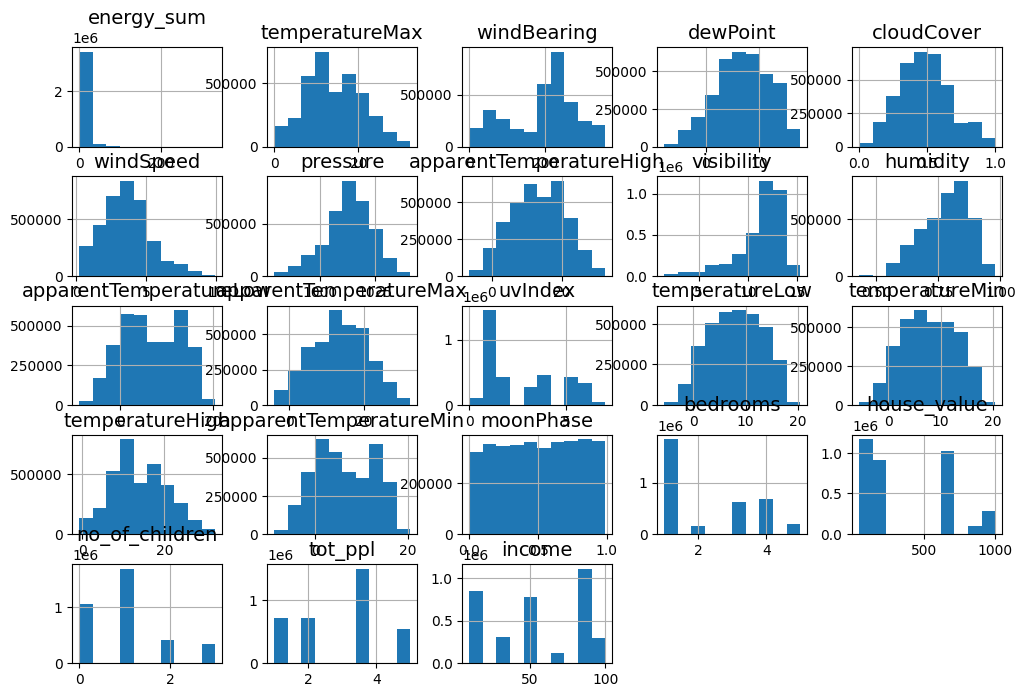

In [7]:
# checking distribution of data
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

energy_info.hist(bins=10, figsize=(12, 8))
plt.show()

## Feature engineering

### Working on date columns

In [8]:
# converting column type to datetime
def convert_to_date_type(df, col_name):
    return pd.to_datetime(df[col_name])

In [9]:
date_cols = ['date', 'sunsetTime', 'sunriseTime']
for col in date_cols:
    energy_info[col] = convert_to_date_type(energy_info, col)

In [10]:
energy_info.describe()

,energy_sum,date,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,apparentTemperatureMin,moonPhase,bedrooms,house_value,no_of_children,tot_ppl,income
count,3.509622e+06,3509652,3.509652e+06,3.509652e+06,3.509652e+06,3.504554e+06,3.509652e+06,3.509652e+06,3.509652e+06,3.509652e+06,3.509652e+06,3.509652e+06,3.509652e+06,3.504554e+06,3509652,3.509652e+06,3.509652e+06,3.509652e+06,3509652,3.509652e+06,3.509652e+06,3.480100e+06,3.480100e+06,3.480100e+06,3.480100e+06,3.480100e+06
mean,1.012373e+01,2013-03-27 21:28:42.767728128,1.413323e+01,1.948034e+02,6.931818e+00,4.814077e-01,3.590107e+00,1.012955e+03,1.316583e+01,1.129270e+01,7.795691e-01,6.641368e+00,1.337893e+01,2.674502e+00,2013-03-28 15:31:38.490673920,8.152914e+00,7.868356e+00,1.400748e+01,2013-03-28 03:28:51.738979328,6.314622e+00,5.043763e-01,2.208279e+00,3.624411e+02,1.013988e+00,2.907190e+00,5.613925e+01
min,0.000000e+00,2011-11-23 00:00:00,-6.000000e-02,0.000000e+00,-7.840000e+00,0.000000e+00,2.000000e-01,9.792500e+02,-6.460000e+00,1.480000e+00,4.300000e-01,-8.880000e+00,-4.110000e+00,0.000000e+00,2011-11-23 16:03:50,-5.640000e+00,-5.640000e+00,-8.100000e-01,2011-11-23 07:32:38,-8.880000e+00,0.000000e+00,1.000000e+00,5.000000e+01,0.000000e+00,1.000000e+00,1.000000e+01
25%,4.682000e+00,2012-10-21 00:00:00,9.420000e+00,1.230000e+02,3.280000e+00,3.500000e-01,2.380000e+00,1.006770e+03,6.980000e+00,1.048000e+01,7.100000e-01,1.580000e+00,7.300000e+00,1.000000e+00,2012-10-21 16:55:53,4.170000e+00,3.680000e+00,9.170000e+00,2012-10-21 06:36:25,1.300000e+00,2.600000e-01,1.000000e+00,5.000000e+01,0.000000e+00,2.000000e+00,3.000000e+01
50%,7.815000e+00,2013-03-30 00:00:00,1.327000e+01,2.170000e+02,7.020000e+00,4.700000e-01,3.450000e+00,1.013640e+03,1.314000e+01,1.199000e+01,7.900000e-01,6.200000e+00,1.327000e+01,2.000000e+00,2013-03-30 18:30:51,8.160000e+00,7.600000e+00,1.314000e+01,2013-03-30 05:41:12,5.620000e+00,5.100000e-01,1.000000e+00,2.000000e+02,1.000000e+00,3.500000e+00,5.000000e+01
75%,1.256900e+01,2013-09-10 00:00:00,1.882000e+01,2.520000e+02,1.078000e+01,6.100000e-01,4.570000e+00,1.019880e+03,1.881000e+01,1.281000e+01,8.600000e-01,1.224000e+01,1.882000e+01,4.000000e+00,2013-09-10 18:28:49,1.224000e+01,1.207000e+01,1.881000e+01,2013-09-10 05:28:55,1.207000e+01,7.500000e-01,4.000000e+00,6.250000e+02,1.000000e+00,3.500000e+00,9.000000e+01
max,3.325560e+02,2014-02-28 00:00:00,3.240000e+01,3.590000e+02,1.777000e+01,1.000000e+00,9.960000e+00,1.040920e+03,3.242000e+01,1.534000e+01,9.800000e-01,2.054000e+01,3.242000e+01,7.000000e+00,2014-02-28 17:39:22,2.054000e+01,2.054000e+01,3.240000e+01,2014-02-28 06:49:37,2.054000e+01,9.900000e-01,5.000000e+00,1.000000e+03,3.000000e+00,5.000000e+00,1.000000e+02
std,9.129041e+00,NaN,6.538083e+00,8.904418e+01,5.010815e+00,1.907060e-01,1.693724e+00,1.056488e+01,7.694098e+00,2.324793e+00,9.709640e-02,6.288725e+00,7.507729e+00,1.893955e+00,NaN,5.053530e+00,5.085640e+00,6.627812e+00,NaN,6.312908e+00,2.872194e-01,1.397154e+00,3.145288e+02,9.009525e-01,1.323994e+00,3.359821e+01


In [11]:
# extracting various columns from date
def extract_date(df, date_col_name, delete_col = True):
    df[f'{date_col_name}_year'] = df[date_col_name].dt.year
    df[f'{date_col_name}_month'] = df[date_col_name].dt.month
    df[f'{date_col_name}_day'] = df[date_col_name].dt.day
    df[f'{date_col_name}_day_of_week'] = df[date_col_name].dt.dayofweek
    df[f'{date_col_name}_day_of_week_name'] = df[date_col_name].dt.day_name()
    df[f'{date_col_name}_is_weekend'] = np.where(df[f'{date_col_name}_day_of_week_name'].isin(['Sunday', 'Saturday']), 1, 0)
    df = df.drop([f'{date_col_name}_day_of_week_name'], axis=1)
    if delete_col:
        df = df.drop([date_col_name], axis=1)
    return df

In [12]:
# creating a day_time_column which represents number of minutes the sun was out
energy_info['day_time'] = energy_info['sunsetTime'] - energy_info['sunriseTime']
energy_info['day_time_minutes'] = energy_info['day_time'].dt.seconds // 60 
energy_info = energy_info.drop(['day_time', 'sunriseTime', 'sunsetTime'], axis=1)

In [13]:
energy_info = extract_date(energy_info, 'date', False)

In [14]:
# reading the holidays table
holidays = pd.read_csv(f"../data/archive/uk_bank_holidays.csv")
holidays['date'] = convert_to_date_type(holidays, 'Bank holidays')
holidays = holidays.drop('Bank holidays', axis=1)

In [15]:
def is_holiday(df):
    if df['date'] in holidays['date'].tolist() or df['date_is_weekend'] == 1: return 1
    return 0
# if the day is a holiday or a weekend the is_holiday column = 1
energy_info['is_holiday'] = energy_info.loc[:, ['date', 'date_is_weekend']].apply(is_holiday, axis=1)
energy_info

,LCLid,energy_sum,date,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,acorn,bedrooms,house_value,no_of_children,tot_ppl,income,employment,family_structure,savings,house_type,day_time_minutes,date_year,date_month,date_day,date_day_of_week,date_is_weekend,is_holiday
0,MAC000002,7.098,2012-10-12,14.72,250,7.08,0.48,5.42,1005.33,13.99,13.07,0.75,6.47,14.73,2.0,6.47,8.51,13.99,7.12,0.89,ACORN-A,5.0,1000.0,0.0,5.0,100.0,self_employed,couple_with_dependent_children,saving_a_lot,detached_house,653,2012,10,12,4,0,0
1,MAC000002,11.087,2012-10-13,11.53,252,6.15,0.29,2.18,1004.92,11.53,12.94,0.84,1.64,11.53,2.0,2.81,6.41,11.53,4.01,0.92,ACORN-A,5.0,1000.0,0.0,5.0,100.0,self_employed,couple_with_dependent_children,saving_a_lot,detached_house,650,2012,10,13,5,1,1
2,MAC000002,13.223,2012-10-14,12.32,300,4.10,0.20,2.36,1002.50,12.32,11.86,0.80,2.83,12.32,2.0,4.09,2.81,12.32,1.64,0.96,ACORN-A,5.0,1000.0,0.0,5.0,100.0,self_employed,couple_with_dependent_children,saving_a_lot,detached_house,646,2012,10,14,6,1,1
3,MAC000002,10.257,2012-10-15,13.03,220,6.39,0.31,2.97,1002.67,13.03,12.17,0.84,7.15,13.03,1.0,9.81,4.09,13.03,2.83,0.99,ACORN-A,5.0,1000.0,0.0,5.0,100.0,self_employed,couple_with_dependent_children,saving_a_lot,detached_house,642,2012,10,15,0,0,0
4,MAC000002,9.769,2012-10-16,14.74,226,6.91,0.39,5.37,1000.80,14.74,12.59,0.74,7.41,14.74,1.0,8.80,9.06,14.74,7.15,0.03,ACORN-A,5.0,1000.0,0.0,5.0,100.0,self_employed,couple_with_dependent_children,saving_a_lot,detached_house,638,2012,10,16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509647,MAC002774,0.128,2014-02-02,9.30,221,2.63,0.22,4.75,1005.39,6.48,12.89,0.72,2.02,6.48,1.0,4.97,5.79,9.30,3.21,0.10,ACORN-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,553,2014,2,2,6,1,1
3509648,MAC002774,0.114,2014-02-03,7.99,139,2.86,0.47,4.92,1003.89,4.59,12.50,0.79,1.12,4.59,1.0,4.22,4.97,7.99,1.96,0.13,ACORN-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556,2014,2,3,0,0,0
3509649,MAC002774,0.142,2014-02-04,8.88,172,2.69,0.42,5.30,996.87,5.63,12.05,0.75,1.03,5.63,1.0,5.54,4.22,8.88,1.12,0.17,ACORN-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560,2014,2,4,1,0,0
3509650,MAC002774,0.124,2014-02-05,9.64,193,4.06,0.73,7.86,982.20,5.86,10.91,0.77,3.56,5.86,1.0,7.01,5.54,9.64,1.03,0.20,ACORN-U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,563,2014,2,5,2,0,0


In [16]:
energy_info = energy_info.drop(['date', 'acorn'], axis=1)

In [17]:
# creating a season column
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Winter', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Summer',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}


energy_info['season'] = energy_info['date_month'].apply(lambda x: season_dict[x])

In [18]:
energy_info

,LCLid,energy_sum,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,bedrooms,house_value,no_of_children,tot_ppl,income,employment,family_structure,savings,house_type,day_time_minutes,date_year,date_month,date_day,date_day_of_week,date_is_weekend,is_holiday,season
0,MAC000002,7.098,14.72,250,7.08,0.48,5.42,1005.33,13.99,13.07,0.75,6.47,14.73,2.0,6.47,8.51,13.99,7.12,0.89,5.0,1000.0,0.0,5.0,100.0,self_employed,couple_with_dependent_children,saving_a_lot,detached_house,653,2012,10,12,4,0,0,Fall
1,MAC000002,11.087,11.53,252,6.15,0.29,2.18,1004.92,11.53,12.94,0.84,1.64,11.53,2.0,2.81,6.41,11.53,4.01,0.92,5.0,1000.0,0.0,5.0,100.0,self_employed,couple_with_dependent_children,saving_a_lot,detached_house,650,2012,10,13,5,1,1,Fall
2,MAC000002,13.223,12.32,300,4.10,0.20,2.36,1002.50,12.32,11.86,0.80,2.83,12.32,2.0,4.09,2.81,12.32,1.64,0.96,5.0,1000.0,0.0,5.0,100.0,self_employed,couple_with_dependent_children,saving_a_lot,detached_house,646,2012,10,14,6,1,1,Fall
3,MAC000002,10.257,13.03,220,6.39,0.31,2.97,1002.67,13.03,12.17,0.84,7.15,13.03,1.0,9.81,4.09,13.03,2.83,0.99,5.0,1000.0,0.0,5.0,100.0,self_employed,couple_with_dependent_children,saving_a_lot,detached_house,642,2012,10,15,0,0,0,Fall
4,MAC000002,9.769,14.74,226,6.91,0.39,5.37,1000.80,14.74,12.59,0.74,7.41,14.74,1.0,8.80,9.06,14.74,7.15,0.03,5.0,1000.0,0.0,5.0,100.0,self_employed,couple_with_dependent_children,saving_a_lot,detached_house,638,2012,10,16,1,0,0,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509647,MAC002774,0.128,9.30,221,2.63,0.22,4.75,1005.39,6.48,12.89,0.72,2.02,6.48,1.0,4.97,5.79,9.30,3.21,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,553,2014,2,2,6,1,1,Winter
3509648,MAC002774,0.114,7.99,139,2.86,0.47,4.92,1003.89,4.59,12.50,0.79,1.12,4.59,1.0,4.22,4.97,7.99,1.96,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556,2014,2,3,0,0,0,Winter
3509649,MAC002774,0.142,8.88,172,2.69,0.42,5.30,996.87,5.63,12.05,0.75,1.03,5.63,1.0,5.54,4.22,8.88,1.12,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560,2014,2,4,1,0,0,Winter
3509650,MAC002774,0.124,9.64,193,4.06,0.73,7.86,982.20,5.86,10.91,0.77,3.56,5.86,1.0,7.01,5.54,9.64,1.03,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,563,2014,2,5,2,0,0,Winter


In [19]:
energy_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509652 entries, 0 to 3509651
Data columns (total 36 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   LCLid                    object 
 1   energy_sum               float64
 2   temperatureMax           float64
 3   windBearing              int64  
 4   dewPoint                 float64
 5   cloudCover               float64
 6   windSpeed                float64
 7   pressure                 float64
 8   apparentTemperatureHigh  float64
 9   visibility               float64
 10  humidity                 float64
 11  apparentTemperatureLow   float64
 12  apparentTemperatureMax   float64
 13  uvIndex                  float64
 14  temperatureLow           float64
 15  temperatureMin           float64
 16  temperatureHigh          float64
 17  apparentTemperatureMin   float64
 18  moonPhase                float64
 19  bedrooms                 float64
 20  house_value              float64
 21  no_of_ch

### Checking correlations and reducing dimensions

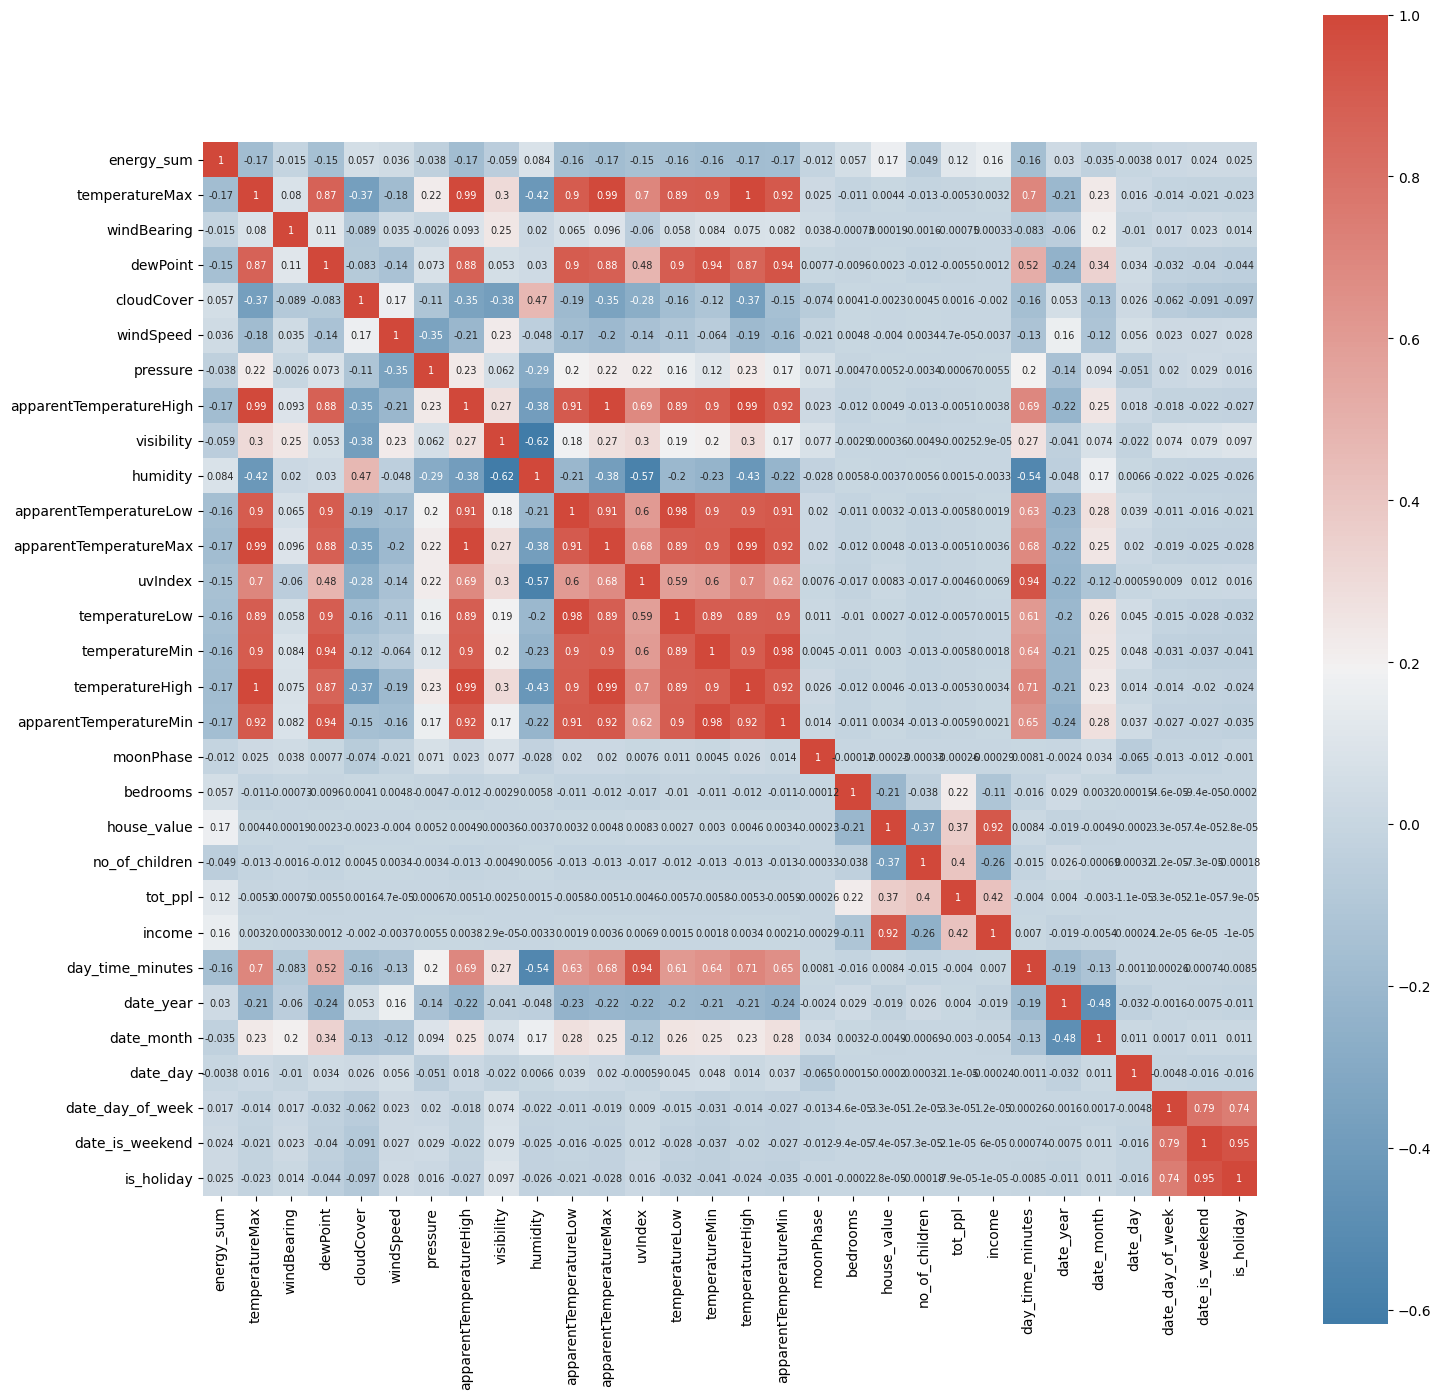

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'number']
# only taking the numerical columns
corrMatrix = energy_info[energy_info.select_dtypes(include=numerics).columns].corr()

size = 17
plt.figure(figsize =(size, size))
plt.rc('font', size=7)
plt.rc('axes', labelsize=7, titlesize=7)
cmap = sns.diverging_palette(-3000, 15, as_cmap=True)
fig = sns.heatmap(corrMatrix , annot=True , square=True ,cmap=cmap)

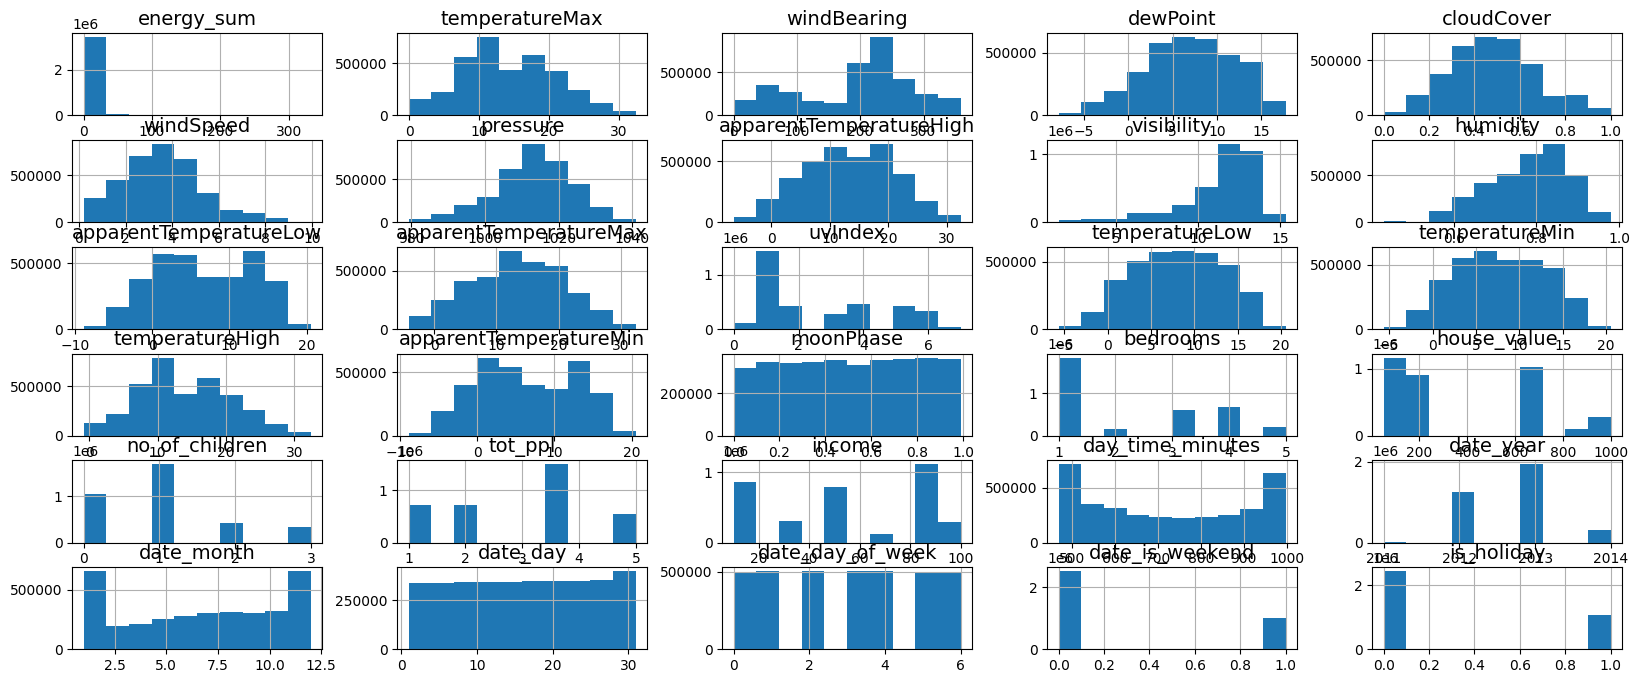

In [21]:
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

energy_info.hist(bins=10, figsize=(20, 8))
plt.show()

let's get rid of features higly corelated to eachother

In [22]:
df = energy_info.drop(['temperatureHigh', 'apparentTemperatureMin', 'temperatureLow', 'apparentTemperatureMax', 'apparentTemperatureLow', 'apparentTemperatureHigh', 'dewPoint', 'temperatureMin', 'uvIndex', 'date_is_weekend', 'date_day_of_week', 'visibility', 'income', 'pressure', ], axis=1)
corrMatrix = df[df.select_dtypes(include=numerics).columns].corr()

### removing all the null values

In [23]:
df = df.loc[~df.isnull().any(axis=1)]

In [ ]:
df.to_csv('../data/final_df.csv')